# 1. 免学部分
* 这一章只有14面内容，所以暂不设免学部分

# 2. 前言

* 大家在做题目前一定要先把第4章的书读一下
* 写本作业，请使用 Anaconda 里的 Notebook
* 我做了一个[打包下载 Link](https://downgit.github.io/#/home?url=https://github.com/liuhui998/pe2/tree/master/04-concat-merge), 大家下载下来解压后，使用 Notebook 打开

# 3. 学习概要
* 我会在每道题有前标明对的书页码
* 如果超纲我会提前提示，并加上资料 Link
---

知识点整理

* pd.concat 合并 DataFrame 数据（非常重要），加上 axis = 1 就是按列合并

* DataFrame 与 Series 数据合并（非常重要），对以要做销售预测的同学非常有帮助

* DataFrame 的成员函数 merge (inner/left) (非常重要），相当于在 Pandas 里实现了 SQL 的功能

  大家以后可以自由的处理大数据
  
  大家一定要看这个 Link: [Pandas Merge 详解](https://blog.csdn.net/stevenkwong/article/details/52540605)，着重看 inner/left, 再做题目。
  
  
* Series 对象里的 isnull() ，检查数据是否为空

* pd.melt 把宽表变成窄表 p114, [Pandas melt 使用](https://blog.csdn.net/maymay_/article/details/80039677)


In [1]:
import pandas as pd

# 4. 合并各个 bu1/bu2/bu3 的费用表

---
备注：这里综合了 85~86面的内容

* 假设大家现在负责统计分析各个 bu 的数据


* 当前目录下有 bu1.xlsx,bu2.xlsx,bu3.xlsx 3个文件，

  将它们分别读取到 df_bu1,df_bu2,df_bu3 中
  
  
* 将 df_bu1,df_bu2,df_bu3 按行合并到 total_df 中

 （备注 pd.concat 是默认按行合并的，所以不用加其它参数）
 
* 统计每个 bu(bu_name) 的费用 (rmb) 汇总 (使用 groupby sum)

* 统计每个 类型（type)的费用 (rmb) 汇总 (使用 groupby sum)

* 画图显示法各个类型费用变化情况 （超纲） （ df.plot.bar() ）
   
  主要是为了复习上一章所学

In [2]:
#当前目录下有 bu1.xlsx,bu2.xlsx,bu3.xlsx 3个文件，
#将它们分别读取到 df_bu1,df_bu2,df_bu3 中
df_bu1 = pd.read_excel("bu1.xlsx")
df_bu1.head()

,bu_name,type,rmb,date
0,bu1,D,1784,2010-01-01
1,bu1,I,1986,2010-01-21
2,bu1,I,761,2010-01-12
3,bu1,J,1620,2010-01-07
4,bu1,K,171,2010-01-06


In [3]:
df_bu2 = pd.read_excel("bu2.xlsx")
df_bu2.head()

,bu_name,type,rmb,date
0,bu2,L,1443,2010-01-04
1,bu2,M,1272,2010-01-25
2,bu2,E,289,2010-01-06
3,bu2,H,1323,2010-01-10
4,bu2,M,86,2010-01-28


In [4]:
df_bu3 = pd.read_excel("bu3.xlsx")
df_bu3.head()


,bu_name,type,rmb,date
0,bu3,I,1169,2010-01-20
1,bu3,F,1763,2010-01-01
2,bu3,A,1649,2010-01-06
3,bu3,G,1708,2010-01-22
4,bu3,M,1187,2010-01-02


In [5]:
df_bu1.shape

(1000, 4)

In [6]:
#将 df_bu1,df_bu2,df_bu3 按行合并到 total_df 中
total_df = pd.concat([df_bu1,df_bu2,df_bu3])
total_df.shape

(3000, 4)

In [7]:
# 统计每个 bu 的费用 (rmb) 汇总 (使用 groupby sum)
# 方法1
total_df.groupby('bu_name')['rmb'].sum()

bu_name
bu1    971039
bu2    990559
bu3    981853
Name: rmb, dtype: int64

In [8]:
# 统计每个 bu 的费用 (rmb) 汇总 (使用 groupby sum)
# 方法2，可以不指定汇总字段，它会把数字类型都汇总
total_df.groupby('bu_name').sum()

,rmb
bu_name,
bu1,971039
bu2,990559
bu3,981853


In [9]:
#统计每个 类型（type)的费用 (rmb) 汇总 (使用 groupby sum)
# 方法1
total_df.groupby('type')['rmb'].sum()

type
A    228007
B    236375
C    228876
D    235864
E    232074
F    206378
G    229962
H    212301
I    239990
J    214356
K    228146
L    232547
M    218575
Name: rmb, dtype: int64

In [10]:
#统计每个 类型（type)的费用 (rmb) 汇总 (使用 groupby sum)
# 方法2
total_df.groupby('type').sum()

,rmb
type,
A,228007
B,236375
C,228876
D,235864
E,232074
F,206378
G,229962
H,212301
I,239990


In [40]:
#画图显示法各个类型费用变化情况 （超纲） （ df.plot.bar() ）
pd.options.plotting.backend = "plotly"
new_df = total_df.groupby(['type']).sum()
new_fig1 = new_df.plot.bar()
new_fig1.show()


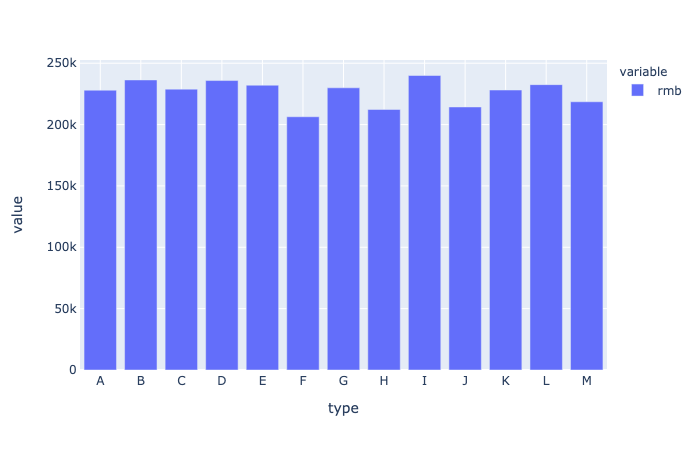

In [42]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
new_fig1.show('png')

In [43]:
# 这里再复习了之前的 sort_values 
# 按 rmb 排序后再算图
new_fig2 = new_df.sort_values(by="rmb").plot.bar()
new_fig2.show()

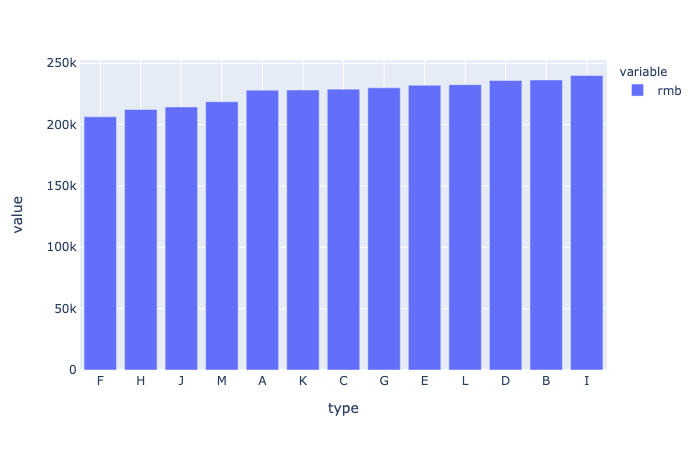

In [44]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
new_fig2.show('png')

# 5. 处理航空客运量预测数据

---
备注：这里综合了 87面的内容

* 假设你现在穿越到 1959-12月且是澳洲航空管理局的工作人，

   你现在在要负责预测未来1年的客运量的变化，以决定如何增加机场相关的投资

* 现在 Peter 给帮你预测了未来12个月的数据，请把它加数据表中，并画出来图好向领导汇报

* 通过这一题大家可以想像一下如何构造复杂的数据表/图表

---

* 读取 AirPassengers.csv 文件的数据到 air_df 中

* 将 air_df 的 Month 列转成日期类型

* 将 air_df 的 Month 列设为索引

* 将 air_df 的数据画图出来(plotly)

* 新创建一个 Series, 名字为 fcst

  index =  ['1960-01', '1960-02', '1960-03', '1960-04','1960-05', '1960-06', '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12']
    
  请将 index 数据类型转成日期型 

  数据部分 = [400, 391, 430, 461, 472, 535, 622, 606, 508, 461, 390, 432]
  
  
* 将 fcst 增加到 air_df 中

* 将 air_df 的数据画图出来(plotly)




In [13]:
#读取 AirPassengers.csv 文件的数据到 air_df 中
air_df = pd.read_csv("AirPassengers.csv")
air_df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
air_df.dtypes

Month         object
Passengers     int64
dtype: object

In [15]:
#将 air_df 的 Month 列转成日期类型
#https://blog.csdn.net/u010099080/article/details/51769732
from datetime import datetime
months = []
for month in air_df['Month']:
    months.append(datetime.strptime(month, '%Y-%m'))
new_air_df = air_df.copy()    
new_air_df['Month'] = months
new_air_df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
new_air_df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [17]:
# 将 air_df 的 Month 列设为索引
new_air_df = new_air_df.set_index('Month')
new_air_df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [45]:
#将 air_df 的数据画图出来(plotly)
#澳洲空乘客流的变化情况
air_fig1 = new_air_df.plot()
air_fig1.show()

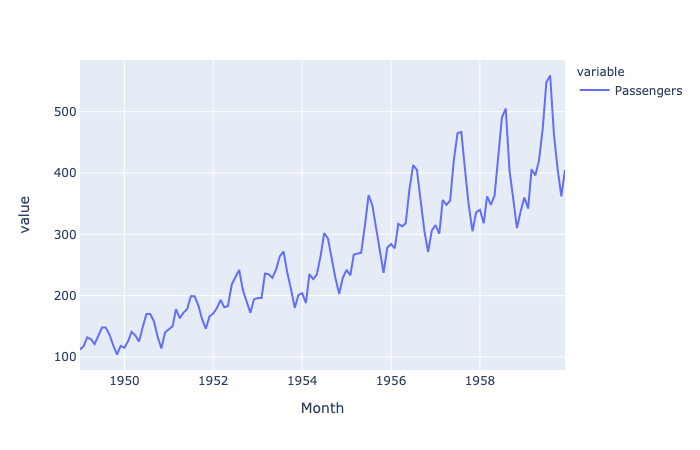

In [46]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
air_fig1.show('png')

In [19]:
#新创建一个 Series, 名字为 fcst
#index = ['1960-01', '1960-02', '1960-03', '1960-04','1960-05', '1960-06', '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12']
#请将 index 数据类型转成日期型
#数据部分 = [400, 391, 430, 461, 472, 535, 622, 606, 508, 461, 390, 432]

index = ['1960-01', '1960-02', '1960-03', '1960-04','1960-05', '1960-06', '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12']

new_months = []
for month in index:
    new_months.append(datetime.strptime(month, '%Y-%m'))

type(new_months[0])

datetime.datetime

In [20]:
fcst = pd.Series(
    [400, 391, 430, 461, 472, 535, 622, 606, 508, 461, 390, 432],
    index = new_months
)
fcst

1960-01-01    400
1960-02-01    391
1960-03-01    430
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
dtype: int64

In [21]:
#将 fcst 增加到 air_df 中
fcst_df = pd.concat([new_air_df,fcst])
fcst_df.columns = ['Passengers','Fcst']
fcst_df.head()

,Passengers,Fcst
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,NaN
1949-04-01,129.0,NaN
1949-05-01,121.0,NaN


In [22]:
# 大家仔细看，1960-01 之前的 Fcst 列的数据都是 NaN (为空)
#           对于已发生的数据一般是不预测
# 1960-01 及以后的 Passengers 列的数据都是 NaN (为空)
# 对于未来的数据不知道，所以为空
fcst_df.tail(20)

,Passengers,Fcst
1959-05-01,420.0,NaN
1959-06-01,472.0,NaN
1959-07-01,548.0,NaN
1959-08-01,559.0,NaN
1959-09-01,463.0,NaN
1959-10-01,407.0,NaN
1959-11-01,362.0,NaN
1959-12-01,405.0,NaN
1960-01-01,NaN,400.0
1960-02-01,NaN,391.0


In [47]:
# 将 air_df 的数据画图出来(plotly)
# Plotly 很聪明把现在(Passengers) 和 未来(Fcst) 的数据分开了
fcst_fig = fcst_df.plot()
fcst_fig.show()

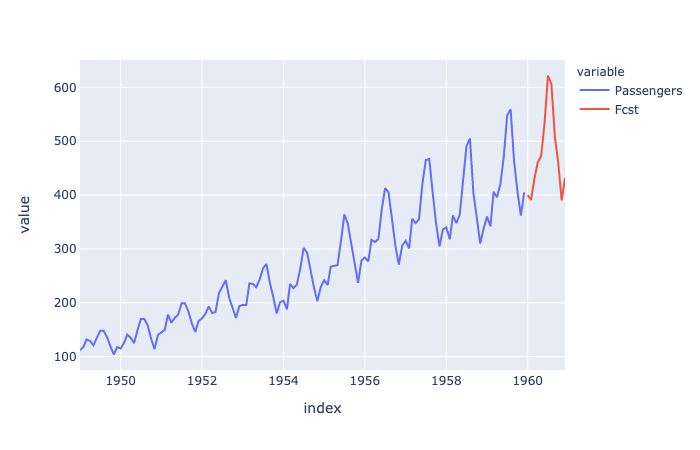

In [48]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
fcst_fig.show('png')

# 6. 合并历年 BU 的销量数量
---
备注：这里综合了 89面的内容

* 超纲 pd.melt 把宽表变成窄表 p114, [Pandas melt 使用](https://blog.csdn.net/maymay_/article/details/80039677)


* 假设大家现在负责统计分析各个 bu 的销量数量
* 近3年的销量汇总数据放在三张 Excel 表中
* 第1列是bu_name, 剩下的列是年数

---
* 当前目录下有 total1.xlsx, total2.xlsx, total3.xlsx 3个文件，

  将它们分别读取到 total1,total2,total3 中


* 将 total1,total2,total3 按列合并到 total 中

* 尝试将 total 的宽表变成窄表



In [24]:
#当前目录下有 total1.xlsx, total2.xlsx, total3.xlsx 3个文件，
#  将它们分别读取到 total1,total2,total3 中
total1 = pd.read_excel("total1.xlsx")
total1 = total1.set_index("bu_name") #设索引方便合并
total1.head()

,2010
bu_name,
bu1,45420820
bu2,45198851
bu3,44874696
bu4,45402272
bu5,45265149


In [25]:
total2 = pd.read_excel("total2.xlsx")
total2 = total2.set_index("bu_name")
total1.head()

,2010
bu_name,
bu1,45420820
bu2,45198851
bu3,44874696
bu4,45402272
bu5,45265149


In [26]:
total3 = pd.read_excel("total3.xlsx")
total3 = total3.set_index("bu_name")
total3.head()

,2012
bu_name,
bu1,56730549
bu2,57333429
bu3,57025416
bu4,57516801
bu5,57303312


In [27]:
#将 total1,total2,total3 按列合并到 total 中
total = pd.concat([total1,total2,total3],axis= 1)
total = total.reset_index() #合并完了，可以去掉索引
total.head()


,bu_name,2010,2011,2012
0,bu1,45420820,41627609,56730549
1,bu2,45198851,43769878,57333429
2,bu3,44874696,43981131,57025416
3,bu4,45402272,44191673,57516801
4,bu5,45265149,44125129,57303312


In [28]:
#尝试将 total 的宽表变成窄表
new_total = pd.melt(total,
       id_vars="bu_name",
       var_name="year",
       value_name="sales")
new_total

,bu_name,year,sales
0,bu1,2010,45420820
1,bu2,2010,45198851
2,bu3,2010,44874696
3,bu4,2010,45402272
4,bu5,2010,45265149
5,bu6,2010,45243900
6,bu7,2010,45450858
7,bu8,2010,45136369
8,bu9,2010,44792492
9,buX,2010,44797543


In [51]:
# 看每年销量的变化（额外）
new_total2 = new_total.groupby("year").sum()
new_total2_fig = new_total2.plot()
new_total2_fig.show()

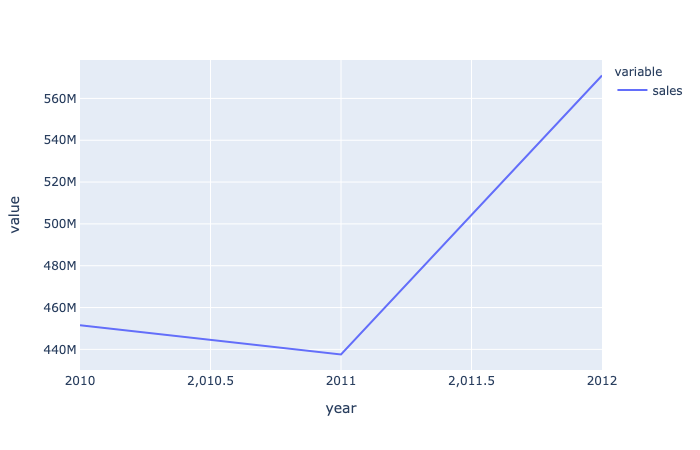

In [53]:
#为了能在 GitHub 中也能看到图，我使用了 show('png'), (非题目)
new_total2_fig.show('png')

# 7. 像专家一样，操作数据
---
备注：这里综合了 93～97 面的内容

* isnull() 是98，99 面的内容

* [Pandas Merge 详解](https://blog.csdn.net/stevenkwong/article/details/52540605)，着重看 inner/left

  这个一定一定一定一定一定要认真看，对于大家处理复杂数据会非常有帮助，程序员数据分析师就这样处理数据的
---
数据介绍

* 商品表(products.xlsx)，里面有 sku, name  字段
* 订单表(orders.xlsx), 里面有 order_no(订单号),sku,quantity 字段
* 物流表(trackings.xlsx) 里面有 order_no(订单号),tracking_no(快递号), is_delivered(是否已配送成功) 字段

---
题目要求

* 将 products.xlsx 读到 products
* 将 orders.xlsx 读取 orders
* 将 trackings.xlsx 读取到 trackings

* 生成 orders1, 根据 orders/products 的sku 相关联，为其增加 name 字段

  使用 merge 函数
  
    
* 生成 orders2, 根据 orders/trackings 的sku 相关联，为其增加 tracking_no，is_delivered 字段

  使用 merge 函数，how="left"
  

* 找出所有已配送成功功的订单

* 找出所有没物流信息的订单



In [30]:
products = pd.read_excel("products.xlsx")
products

,sku,name
0,A1234,AirPods
1,A1235,MacBookPro


In [31]:
orders = pd.read_excel("orders.xlsx")
orders

,order_no,sku,quantity
0,O_2020_01,A1234,2
1,O_2020_02,A1234,2
2,O_2020_03,A1235,1
3,O_2020_04,A1235,1


In [32]:
trackings = pd.read_excel("trackings.xlsx")
trackings

,order_no,tracking_no,is_delivered
0,O_2020_01,T_2020_1,1
1,O_2020_02,T_2020_2,0
2,O_2020_03,T_2020_3,1


In [33]:
#生成 orders1, 根据 orders/products 的sku 相关联，为其增加 name 字段
#使用 merge 函数
  
order1 = orders.merge(products,left_on="sku",right_on="sku")
order1

,order_no,sku,quantity,name
0,O_2020_01,A1234,2,AirPods
1,O_2020_02,A1234,2,AirPods
2,O_2020_03,A1235,1,MacBookPro
3,O_2020_04,A1235,1,MacBookPro


In [34]:
order1 = orders.merge(products,left_on="sku",right_on="sku",how="inner")
order1

,order_no,sku,quantity,name
0,O_2020_01,A1234,2,AirPods
1,O_2020_02,A1234,2,AirPods
2,O_2020_03,A1235,1,MacBookPro
3,O_2020_04,A1235,1,MacBookPro


In [35]:
order1 = orders.merge(products)
order1

,order_no,sku,quantity,name
0,O_2020_01,A1234,2,AirPods
1,O_2020_02,A1234,2,AirPods
2,O_2020_03,A1235,1,MacBookPro
3,O_2020_04,A1235,1,MacBookPro


In [36]:
#生成 orders2, 根据 orders/trackings 的 order_no 相关联，为其增加 tracking_no，is_delivered 字段
#使用 merge 函数，how="left"
order2 = orders.merge(trackings,left_on="order_no",right_on="order_no",how="left")
order2

,order_no,sku,quantity,tracking_no,is_delivered
0,O_2020_01,A1234,2,T_2020_1,1.0
1,O_2020_02,A1234,2,T_2020_2,0.0
2,O_2020_03,A1235,1,T_2020_3,1.0
3,O_2020_04,A1235,1,NaN,NaN


In [37]:
#找出所有已配送成功功的订单
order2[order2.is_delivered == 1]

,order_no,sku,quantity,tracking_no,is_delivered
0,O_2020_01,A1234,2,T_2020_1,1.0
2,O_2020_03,A1235,1,T_2020_3,1.0


In [38]:
#找出所有没物流信息的订单
order2[order2.tracking_no.isnull()]

,order_no,sku,quantity,tracking_no,is_delivered
3,O_2020_04,A1235,1,NaN,NaN


In [39]:
order2.tracking_no.isnull()

0    False
1    False
2    False
3     True
Name: tracking_no, dtype: bool

# 8. 参考资料
* [Pandas Merge 详解](https://blog.csdn.net/stevenkwong/article/details/52540605)，着重看 inner/left
* pd.melt 把宽表变成窄表  [Pandas melt 使用](https://blog.csdn.net/maymay_/article/details/80039677)
